# 问题： 有哪些因素会让船上的人生还率更高？

## 参考文献：
[Calculation and Visualization of Correlation Matrix with Pandas](https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas)

[Matplotlib Color map](https://matplotlib.org/api/cm_api.html)

[matplotlib add_subplot](http://www.codeweblog.com/matplotlib-pyplot中add_subplot方法参数111的含义/)

[matplotlib imshow](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html)

[What does matplotlib `imshow(interpolation='nearest')` do?](https://stackoverflow.com/questions/12473511/what-does-matplotlib-imshowinterpolation-nearest-do)

[matplotlib绘图常见设置](https://www.cnblogs.com/nju2014/p/5707980.html)

In [58]:
# -*- coding: UTF-8 -*-
# 加载样本数据,加载第三方库

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

raw_data = pd.read_csv('titanic-data.csv')

raw_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#相关数据
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# 皮尔逊积矩
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


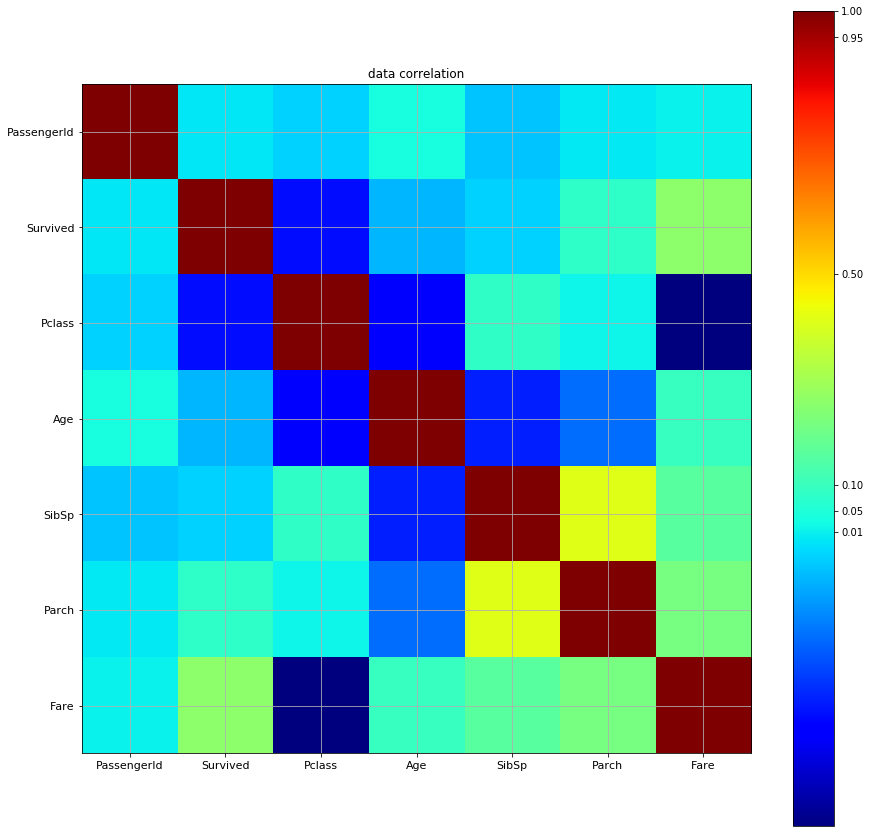

In [59]:
# 图形化皮尔逊积矩表
def correlation_matrix(df,labels):

    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1 = fig.add_subplot(111) #一行一列的第一个
    cmap = cm.get_cmap('jet', 999)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('data correlation')
    #ax1.set_xticks(range(len(labels)))
    ax1.set_xticklabels(labels,fontsize=11)
    ax1.set_yticklabels(labels,fontsize=11)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.01,.05,.10,.50,.95,1])
    plt.show()

labels=['','PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
correlation_matrix(raw_data,labels)


### 由皮尔逊积矩得出相关系数，几个强关联的数据为Fare和Pclass（-0.549500）为强负相关，
### 即Fare（票价）越高，船仓等级越低（Pclass，等级1为最豪华）。
### 而与生还率相关的数据为Pclass，Fare，其他数据可能由于皮尔逊积矩存在局限性，需要进一步调查。

In [80]:
#get unique survived_ppl set
survived_ppl = set()
for indexs in raw_data.index:
    if raw_data.loc[indexs].values[1] == 1:
        survived_ppl.add(raw_data.loc[indexs].values[0])
        
len(survived_ppl)

342

In [83]:
def getdata_1d(df,label):
    return df[[label]]

all_class = getdata_1d(raw_data,'Pclass')
print all_class

     Pclass
0         3
1         1
2         3
3         1
4         3
5         3
6         1
7         3
8         3
9         2
10        3
11        1
12        3
13        3
14        3
15        2
16        3
17        2
18        3
19        3
20        2
21        2
22        3
23        1
24        3
25        3
26        3
27        1
28        3
29        3
..      ...
861       2
862       1
863       3
864       2
865       2
866       2
867       1
868       3
869       3
870       3
871       1
872       1
873       3
874       2
875       3
876       3
877       3
878       3
879       1
880       2
881       3
882       3
883       2
884       3
885       3
886       2
887       1
888       3
889       1
890       3

[891 rows x 1 columns]
